Enter Lower bound of Cropped Area:  2 2
Enter Upper bound of Cropped Area:  7 7
Enter Number of vertices in a Polygon:  3


Start entering Points:
Enter Coordinates of Vertex 1 :


 2 7


Enter Coordinates of Vertex 2 :


 1 5


Enter Coordinates of Vertex 3 :


 4 4


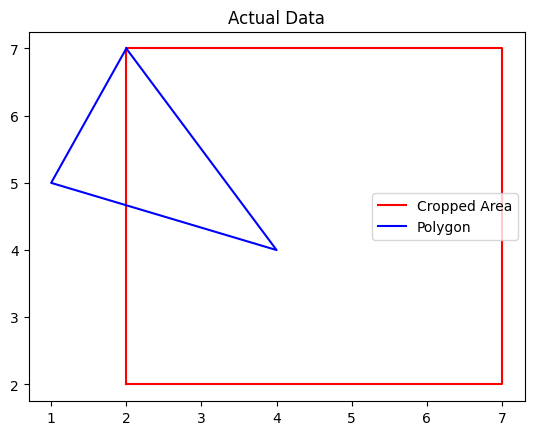

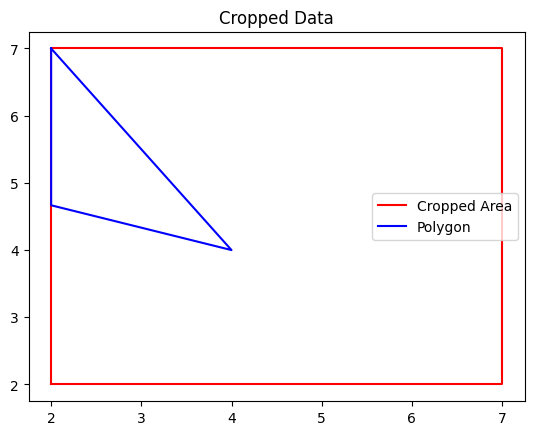

In [1]:
import matplotlib.pyplot as plt

def draw_graph(xlist, ylist, V, title):
    plt.plot(xlist, ylist, c="red", label="Cropped Area")
    x = [point[0] for point in V]
    y = [point[1] for point in V]
    plt.plot(x, y, c="blue", label="Polygon")
    plt.legend()
    plt.title(title)
    plt.show()

def check_points(xmin, ymin, xmax, ymax, x1, y1):
    if x1 >= xmin and x1 <= xmax:
        if y1 >= ymin and y1 <= ymax:
            return True
    return False

def get_xy(xmin, ymin, xmax, ymax, x1, y1, x2, y2):
    m = (y2 - y1) / (x2 - x1)
    if check_points(xmin, ymin, xmax, ymax, x1, y1):
        A = x1
        B = y1
        C = x2
        D = y2
    else:
        A = x2
        B = y2
        C = x1
        D = y1
    if C <= xmin:
        x = xmin
        y = B + (m * (xmin - A))
    elif C >= xmax:
        x = xmax
        y = B + (m * (xmax - A))
    elif D <= ymin:
        y = ymin
        x = ((ymin - B) / m) + A
    else:
        y = ymax
        x = ((ymax - B) / m) + A
    return (x, y)

def clip_using_sutherland_hodgeman(x1, y1, x2, y2, V):
    v1 = []
    for i in range(len(V) - 1):
        inside_start = check_points(x1, y1, x2, y2, V[i][0], V[i][1])
        inside_end = check_points(x1, y1, x2, y2, V[i+1][0], V[i+1][1])
        if inside_start and inside_end:
            v1.append(V[i+1])
        elif inside_start and not inside_end:
            x, y = get_xy(x1, y1, x2, y2, V[i][0], V[i][1], V[i+1][0], V[i+1][1])
            v1.append((x, y))
        elif not inside_start and inside_end:
            x, y = get_xy(x1, y1, x2, y2, V[i][0], V[i][1], V[i+1][0], V[i+1][1])
            v1.append((x, y))
            v1.append(V[i+1])
    return v1

x1, y1 = map(int, input("Enter Lower bound of Cropped Area: ").split())
x2, y2 = map(int, input("Enter Upper bound of Cropped Area: ").split())

xlist = [x1, x1, x2, x2, x1]
ylist = [y1, y2, y2, y1, y1]

count = int(input("Enter Number of vertices in a Polygon: "))
V = []
print("Start entering Points:")
for i in range(count):
    print("Enter Coordinates of Vertex", i + 1, ":")
    x, y = map(int, input().split())
    V.append((x, y))
V.append(V[0])  # Close the polygon

draw_graph(xlist, ylist, V, "Actual Data")

V1 = clip_using_sutherland_hodgeman(x1, y1, x2, y2, V)
draw_graph(xlist, ylist, V1, "Cropped Data")
# inputs - 2 2
# 7 7
# 3
# 2 7
# 1 5
# 4 4